### Import the necessary libarary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

####  read the dataset

In [2]:
train_data = pd.read_csv(r"C:\Users\USER\MLWorkspace\titanic\train.csv")
test_data = pd.read_csv(r"C:\Users\USER\MLWorkspace\titanic\test.csv")
print(train_data.shape)
print(test_data.shape)  

(891, 12)
(418, 11)


In [3]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


## Data validation

#### there are colums with missing values. the age, embarked and cabin column. the age misssing value is replaced with the mean value of the age column. I forward filled the the cabin and embarked columns.

#### checking for missing values

In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_age = np.random.randint(train_data['Age'].mean()-train_data['Age'].std(), train_data['Age'].mean()+train_data['Age'].std(), 177)

In [7]:
train_data['Age'][train_data['Age'].isnull()] = train_age

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1726883066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Age'][train_data['Age'].isnull()] = train_age


In [8]:
# replcaing NAN with mean of the age column
# train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

#  replcaing NAN with 0 in the cabin column
train_data['Cabin'] = train_data['Cabin'].fillna('S', inplace=True)

# filling no values
train_data['Embarked'].fillna(method='ffill',axis=0, inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        0 non-null      object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA 

It is important we understand and know more about the passagers onboard. There are total number of 891 people in the train, we have 577 males and 314 females. The are 3 passenger classes in the train, the vip, business class and the economy class with 210, 184 and 491 respectively in the cabins. It is seen that 549 people did not survived while 314 people managed to survive. in the first class cabin, 136 people survived while 80 couldn't, 63% of the cabin survived. also in the second class cabin, 87 people survived while 97 didn't make it, 47% of the cabin survived. 24% of the 3rd cabin survived, 372 of the people didn't survive in the economy class while 199 people was rescued.

In [10]:
total_passenger = train_data['Sex'].value_counts().sum()

In [11]:
sex_counts =train_data['Sex'].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

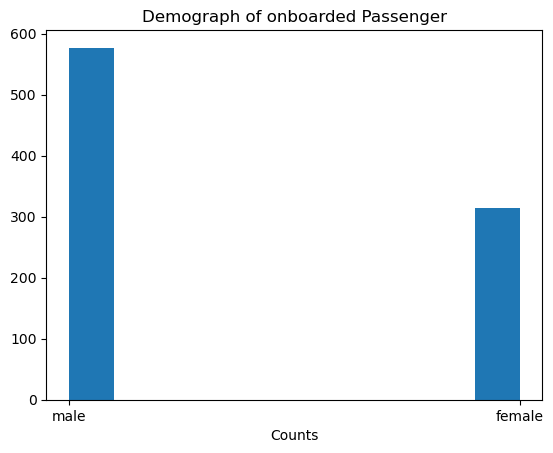

In [12]:
plt.hist(train_data['Sex'])
plt.xlabel('Sex')
plt.xlabel('Counts')
plt.title('Demograph of onboarded Passenger')
plt.show()

In [13]:
survival_counts = train_data['Survived'].value_counts()
survival_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [14]:
survival_counts = train_data.groupby('Pclass')['Survived'].value_counts()
survival_counts

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [15]:
survival_counts = train_data.groupby('Pclass')['Survived'].mean()
survival_counts

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Breaking the survival by gender in the respective passenger class. In the first class, 91females survived while 3 died, 45 males survived while 77 died. In he second class, 70 females survived while 6 died, 17 males survived while 91 died. In the last class, equal number of people died and survived, 72 females survived while 72 died, 300 males survived while 47 died.

In [16]:
survival_by_class_counts = train_data.groupby(['Pclass', 'Sex'])['Survived'].value_counts()
survival_by_class_counts

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

In [17]:
plt.hist( x=train_data['Sex'], y=train_data['Pclass'])
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

<Figure size 640x480 with 1 Axes>

#### there is a need to know how some people survived. in the first cabin, 137 were alone on board, 7 people have boarded with there spouse,5 people are with 2 siblings and 3 people with 3 siblings. the second cabin contains 120 were alone on board, 55 people have boarded with there spouse,8 people are with 2 siblings and 1 person with 3 siblings. From the 3rd cabin, 351 were alone on board, 83 people have boarded with there spouse,18 people are with 4 siblings, 16 people with 2 siblings, 12 people with 3 siblings, 7 people with  8siblings and 5 people with 5 siblings. Wow, i hope the breakdown is interesting.

In [18]:
survival_counts = train_data.groupby('Pclass')['SibSp'].value_counts()
survival_counts

Pclass  SibSp
1       0        137
        1         71
        2          5
        3          3
2       0        120
        1         55
        2          8
        3          1
3       0        351
        1         83
        4         18
        2         15
        3         12
        8          7
        5          5
Name: count, dtype: int64

In [19]:
Embarked_survival_rate = train_data.groupby('Embarked')['Survived'].mean()
Embarked_survival_rate

Embarked
C    0.556213
Q    0.397436
S    0.336957
Name: Survived, dtype: float64

In [20]:
survival_age = train_data.groupby('Age')['Survived'].mean()
survival_age

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

50% of people between the age range of 20 to 50 survived, same as 55 - 60. People between 63 and 75 couldn't survived, they people are the weekest passengers as a result of old age. May their soul rest in peace.

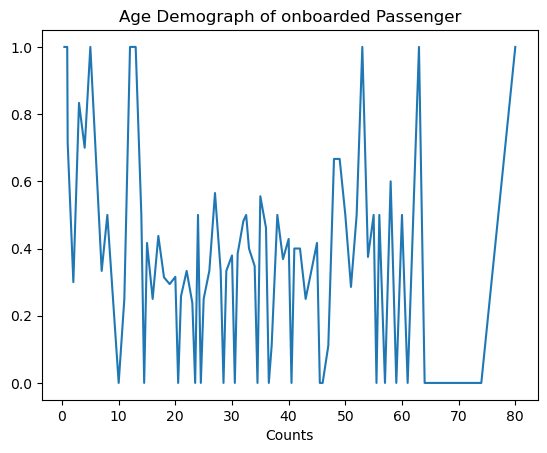

In [21]:
plt.plot(survival_age)
plt.xlabel('Age')
plt.xlabel('Counts')
plt.title('Age Demograph of onboarded Passenger')
plt.show()

In [22]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    169
Q     78
Name: count, dtype: int64

Some family members are 

In [23]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['Family'].value_counts() 

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [24]:
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Family'].value_counts() 

Family
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

In [25]:
def sizeClassifier(number):
    if number == 1:
        return 'Alone'
    elif number > 1 and number < 5:
        return 'Medium'
    else:
        return 'Large'

In [26]:
train_data['Family_size'] = train_data['Family'].apply(sizeClassifier)

In [27]:
test_data['Family_size'] = test_data['Family'].apply(sizeClassifier)

In [28]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,None,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,None,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S,1,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,None,S,1,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,43.0,1,2,W./C. 6607,23.4500,None,S,4,Medium
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,None,C,1,Alone


C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1492731673.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'][train_data['Survived'] == 0])
C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1492731673.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'][train_

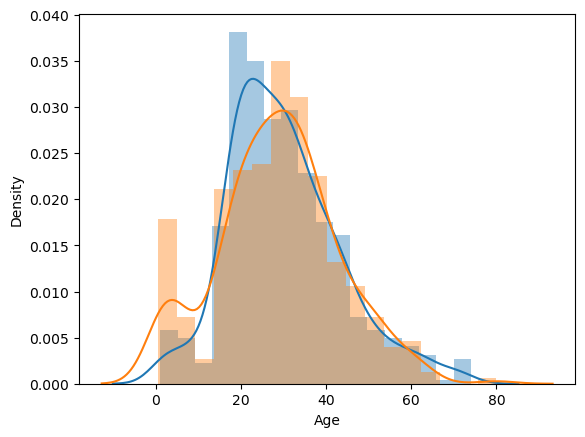

In [29]:
sns.distplot(train_data['Age'][train_data['Survived'] == 0])
sns.distplot(train_data['Age'][train_data['Survived'] == 1])                               
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\2555955253.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Fare'][train_data['Survived'] == 0])
C:\Users\USER\AppData\Local\Temp\ipykernel_12812\2555955253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Fare'][trai

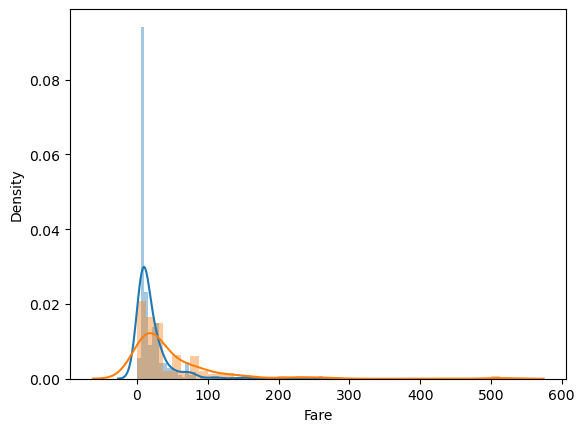

In [30]:
sns.distplot(train_data['Fare'][train_data['Survived'] == 0])
sns.distplot(train_data['Fare'][train_data['Survived'] == 1])                               
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\2926822198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'])


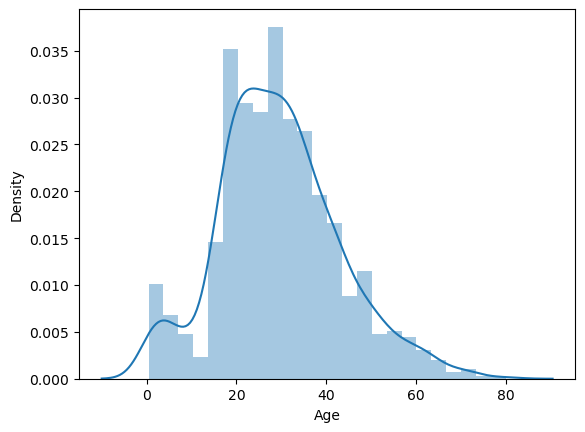

In [31]:
sns.distplot(train_data['Age'])
plt.show()

In [32]:

train_data.shape

(891, 14)

### Fixing test data

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Family       418 non-null    int64  
 12  Family_size  418 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 42.6+ KB


In [34]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Family_size      0
dtype: int64

In [35]:
test_age = np.random.randint(test_data['Age'].mean()-test_data['Age'].std(), test_data['Age'].mean() + test_data['Age'].std(), 86)

In [36]:
test_data['Age'][test_data['Age'].isnull()] = test_age

C:\Users\USER\AppData\Local\Temp\ipykernel_12812\1548474921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Age'][test_data['Age'].isnull()] = test_age


In [37]:
# replcaing NAN with mean of the age column
# test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

#  replcaing NAN with 0 in the cabin column
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

# filling no values
test_data['Embarked'].fillna(method='ffill',axis=0, inplace=True)

In [38]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
Family_size      0
dtype: int64

In [39]:
passengerId = test_data['PassengerId'].values

In [40]:
# Drop columns from the DataFrame
col_to_drop = ['PassengerId','Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Family']

#dropping column from train data
train_data.drop(col_to_drop, axis=1, inplace=True)
test_data.drop(col_to_drop, axis=1, inplace=True)

# encodinging categorical columns
train_data = pd.get_dummies(train_data, columns=['Pclass','Sex', 'Embarked', 'Family_size'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Pclass', 'Sex', 'Embarked','Family_size' ], drop_first=True)


In [41]:
print(train_data.shape)
print(test_data.shape)

(891, 10)
(418, 9)


### Predicting Survival

In [42]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#spliting the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred 

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [44]:
xf = test_data.iloc[:,:].values

In [45]:
final_y_pred = model.predict(xf)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [46]:
final_y_pred.shape

(418,)

In [47]:
passengerId.shape

(418,)

In [48]:
final_pred = pd.DataFrame()
final_pred['PassengeId'] = passengerId
final_pred['Survived'] = final_y_pred
final_pred.to_csv('Submission.csv', index=False)

In [49]:
from sklearn.preprocessing import StandardScaler

#initiating the standard scaler
scaler = StandardScaler()

#fitting data
X_scaled= scaler.fit_transform(X)

#spliting the data set
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [50]:
print("y_pred:", y_pred.shape)
print("y_train:", y_train.shape)

y_pred: (179,)
y_train: (712,)


In [51]:
from sklearn.model_selection import cross_val_score


cross_val_score_scaled = cross_val_score(model, X_scaled,y, cv=5)
print("cross validation score:", cross_val_score_scaled)
print("cross Val scaled", cross_val_score_scaled.mean())

cross validation score: [0.70949721 0.74157303 0.81460674 0.76404494 0.79775281]
cross Val scaled 0.7654949469587596


### Verifying Model performance


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print('accuracy:', accuracy)

accuracy: 0.7597765363128491


In [53]:
Scaled_accuracy = accuracy_score(y_test_scaled, y_pred_scaled)
print('accuracy:', Scaled_accuracy)



accuracy: 0.7597765363128491


In [54]:
cross_val_score = cross_val_score(model, X,y, cv=5)
print("cross validation score:", cross_val_score)
print("cross Val", cross_val_score.mean())

cross validation score: [0.68156425 0.71348315 0.7752809  0.75842697 0.78651685]
cross Val 0.743054422195719
